In [23]:
import pandas as pd

file_path = 'https://file.notion.so/f/f/83c75a39-3aba-4ba4-a792-7aefe4b07895/c79fcf90-1107-4040-adda-9efe350c35c1/Mall_Customers.csv?table=block&id=62ad2314-b45a-47e7-9857-9573566ac3ae&spaceId=83c75a39-3aba-4ba4-a792-7aefe4b07895&expirationTimestamp=1735610400000&signature=vNv2OlxYrXRN_jwISB575UAT9gN5RvzszFXkvGivXOc&downloadName=Mall_Customers.csv'
df = pd.read_csv(file_path) # 파일 경로설정

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# 결측치 확인
print(df.isnull().sum())

# 이상치 탐지 및 처리
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
z_scores = np.abs(zscore(df[features]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# 수치형 변수 선택
# Age, Annual Income (k$), Spending Score (1-100)
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 스케일링
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 스케일링된 데이터 확인
print(features_scaled[:5])

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


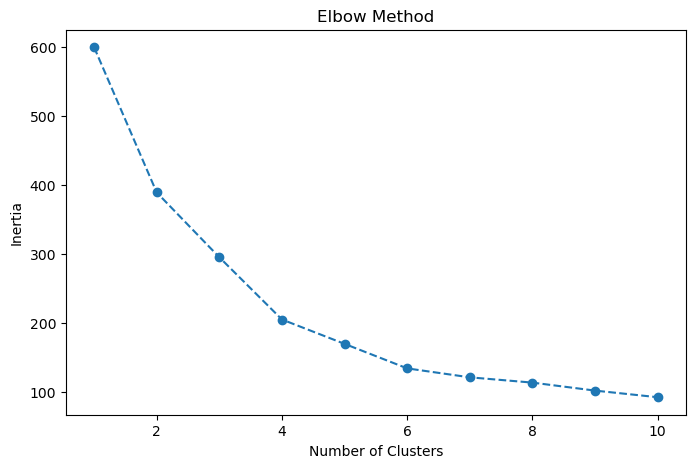

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 엘보우 방법으로 최적의 클러스터 수 결정
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 플롯
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 최적의 클러스터 수로 K-means 적용
optimal_clusters = 5  # 엘보우 플롯에서 확인된 클러스터 수
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(features_scaled)

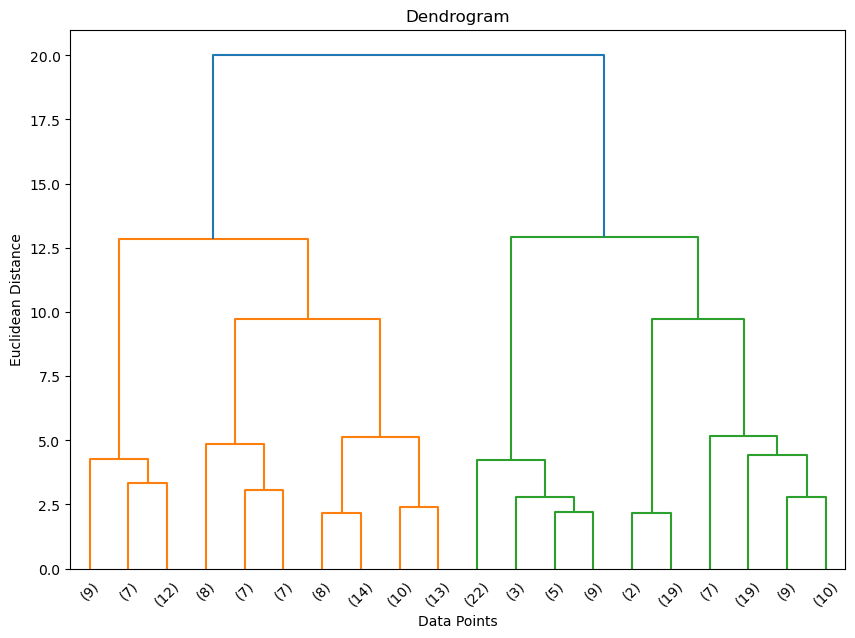

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 계층적 군집화 수행
linked = linkage(features_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [28]:
from sklearn.cluster import DBSCAN

# DBSCAN 모델
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(features_scaled)

# 클러스터링 결과 확인
print(df['Cluster_DBSCAN'].value_counts())

Cluster_DBSCAN
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64


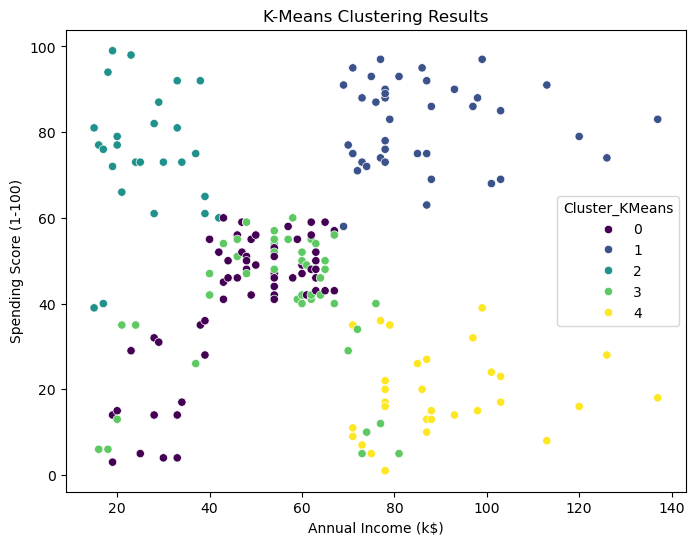

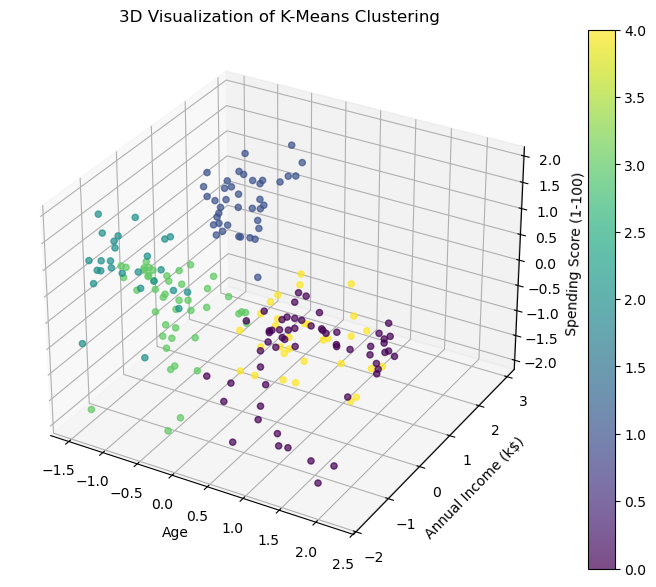

In [29]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 2D 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], 
                y=df['Spending Score (1-100)'], 
                hue=df['Cluster_KMeans'], 
                palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_scaled[:, 0], 
                      features_scaled[:, 1], 
                      features_scaled[:, 2], 
                      c=df['Cluster_KMeans'], 
                      cmap='viridis', alpha=0.7)
ax.set_title('3D Visualization of K-Means Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(features_scaled, df['Cluster_KMeans'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.40846873777345605


In [31]:
cluster_summary = df.groupby('Cluster_KMeans').mean(numeric_only=True)
print(cluster_summary)

                CustomerID        Age  Annual Income (k$)  \
Cluster_KMeans                                              
0                68.775862  55.275862           47.620690   
1               161.025000  32.875000           86.100000   
2                23.461538  25.769231           26.115385   
3                86.377778  26.733333           54.311111   
4               166.870968  44.387097           89.774194   

                Spending Score (1-100)  Cluster_DBSCAN  
Cluster_KMeans                                          
0                            41.706897        1.396552  
1                            81.525000        3.000000  
2                            74.846154       -0.038462  
3                            40.911111        1.844444  
4                            18.483871        0.354839  
